# Routes database
As of January 2012, the OpenFlights/Airline Route Mapper Route Database contains 59036 routes between 3209 airports on 531 airlines spanning the globe.

Content
The data is ISO 8859-1 (Latin-1) encoded.

# Each entry contains the following information:

#### Airline 2-letter (IATA) or 3-letter (ICAO) code of the airline.
#### Airline ID Unique OpenFlights identifier for airline (see Airline).
#### Source airport 3-letter (IATA) or 4-letter (ICAO) code of the source airport.
#### Source airport ID Unique OpenFlights identifier for source airport (see Airport)
#### Destination airport 3-letter (IATA) or 4-letter (ICAO) code of the destination airport.
#### Destination airport ID Unique OpenFlights identifier for destination airport (see Airport)
#### Codeshare "Y" if this flight is a codeshare (that is, not operated by Airline, but another carrier), empty otherwise.
#### Stops Number of stops on this flight ("0" for direct)
#### Equipment 3-letter codes for plane type(s) generally used on this flight, separated by spaces
#### The special value \N is used for "NULL" to indicate that no value is available.

Notes:

Routes are directional: if an airline operates services from A to B and from B to A, both A-B and B-A are listed separately.
Routes where one carrier operates both its own and codeshare flights are listed only once.

# IMPORT THE NECESSARY LIBRALIRIES
We have imported the following libraries to perform EDA, preprocessing, classification and regression

In [1]:
#import packages
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix 
import json
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
print('Load Libraries-Done')

Load Libraries-Done


In [2]:
data= pd.read_csv("routes.csv")
data

,airline,airline ID,source airport,source airport id,destination apirport,destination airport id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [3]:
print("="*50)
print("First Five rows ","\n")
print(data.head(5),"\n")

print("="*50)
print("Information About Dataset","\n")
print(data.info(),"\n")

print("="*50)
print("Describe the Dataset","\n")
print(data.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(data.isnull().sum(),"\n")

print("="*50)
print(" Shape of the Dataset","\n")
print(data.shape,"\n")




First Five rows  

  airline airline ID  source airport  source airport id  destination apirport  \
0      2B        410             AER               2965                   KZN   
1      2B        410             ASF               2966                   KZN   
2      2B        410             ASF               2966                   MRV   
3      2B        410             CEK               2968                   KZN   
4      2B        410             CEK               2968                   OVB   

   destination airport id  codeshare   stops  equipment  
0                    2990        NaN       0        CR2  
1                    2990        NaN       0        CR2  
2                    2962        NaN       0        CR2  
3                    2990        NaN       0        CR2  
4                    4078        NaN       0        CR2   

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 9 columns):
 #   Col

In [4]:
# Correct the misspelled column name using the rename method
data.rename(columns={' destination apirport': 'destination airport'}, inplace=True)
data

,airline,airline ID,source airport,source airport id,destination airport,destination airport id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   airline                  67663 non-null  object
 1   airline ID               67663 non-null  object
 2    source airport          67663 non-null  object
 3    source airport id       67663 non-null  object
 4   destination airport      67663 non-null  object
 5    destination airport id  67663 non-null  object
 6    codeshare               14597 non-null  object
 7    stops                   67663 non-null  int64 
 8    equipment               67645 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


In [6]:
data.columns

Index(['airline', 'airline ID', ' source airport', ' source airport id',
       'destination airport', ' destination airport id', ' codeshare',
       ' stops', ' equipment'],
      dtype='object')

In [7]:
data = data.fillna({' equipment': 'Unknown'})
data = data.fillna({' codeshare': 'No codeshare'})


In [8]:
data['airline'].value_counts()

FR    2484
AA    2354
UA    2180
DL    1981
US    1960
      ... 
H7       2
4B       2
6I       2
9D       1
EW       1
Name: airline, Length: 568, dtype: int64

In [9]:
data.isnull().sum()

airline                    0
airline ID                 0
 source airport            0
 source airport id         0
destination airport        0
 destination airport id    0
 codeshare                 0
 stops                     0
 equipment                 0
dtype: int64

In [10]:
data[" codeshare"].value_counts()

No codeshare    53066
Y               14597
Name:  codeshare, dtype: int64

# MAKING NEW DATAFRAMES

## Using the shape function we obtain the following inference:-
Number of Rows which is the number of records - 67663
Number of Columns which is the number of attributes- 9
Using the info function we got to know that the data loads as text and float objects for most of the objects. However we know that some are float, categorical and ordinal
Using the isnull().sum() function we infer that we have some of the records  contain  null values

# Exploratory Data Analysis
Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

We will analyse the attributes of the dataset and summarize the variables, visualizing it and study about the relationship between two variables and plot the data using matplotlib library and seaborn library

These are the plots we are going to see below for the various attributes of the dataset
##### Histogram is for quantitative data – the number of bars depends on the user or to the software.It is an approximate representation of numerical data distribution.
##### Bar Chart is for categorical data – the number of bars depends on the number of categories
##### Scatter Plot is yet another way of representation of attributes of a dataset. It is basically a type of plot or mathematical diagram which uses cartesian coordinates for the display of values. It uses two variables for a set of data , one on the X-axis and one on the Y-axis. In scatter plot , data is represented in form of points on the cartesian plane , with one variable determining the position on the horizontal axis and the other variable determining the position on the vertical axis

In [11]:
def count_values(dataset, cat_variable, order = None):
    """
    Function: Counts values in each category and displays them on a plot.
    
    Parameters: Dataset, category feature, and order of appearance (order is optional).
    """
    ax = sns.countplot(x = cat_variable, data = dataset, palette = sns.cubehelix_palette(), order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
    
    plt.title(f"Number of items in each {cat_variable} category")
    plt.show()

count_values function takes the parameter dataset i.e. the dataframe which contains the csv file, an attribute of the csv file and the order we want to see in the plot.

For example- codeshare has two values Y and No codeshare so [Y,No codeshare] can be our order as well as [No codeshare,Y].
The function plots a bar graph i.e. it is used for categorical data.
The function uses seaborn and matplotlib libraries.

In [12]:
def plot_distribution(dataset, feature):
    """
    Function: Computes and displays distribution of features with continuous values; plots their mean and median.
    
    Parameters: Dataset and feature with continuous values.
    """
    plt.hist(dataset[feature], bins = "fd")
    
    plt.axvline(dataset[feature].mean(), color = "red", label = "mean")
    plt.axvline(dataset[feature].median(), color = "orange", label = "median")
    
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Distribution of values in {feature}")
    plt.show()

###### plot_distibution function takes the dataframe of csv file and attribute of the dataset. It does not require any order as it uses continuous values.

The function plots a histogram and also displays mean and median of the attirbute.
The function uses matplotlib library

In [13]:
def cross_plot(dataset, lead_category, sup_category, order = None, hue_order= None):
    """
    Function: Plots interaction between two categorical variables.
    
    Parameters: Dataset, lead category, suplemental category, and order of appearance (order is optional).
    """
    
    ax = sns.countplot(x = lead_category, hue = sup_category, data = dataset, order = order, palette="Blues_r", hue_order= hue_order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
    
    plt.title(f"Number of items in each {lead_category} with respect to {sup_category}")
    
    plt.show()

#### cross_plot uses 5 parameters.First being the dataframe of the csv file, second the leading attribute which will be plotted on X-axis, third the suplemental attribute which will be plotted with respect to the result and then the orders of lead attribute and suplememtal attribute respectively.

It is a plot between two categorical variables
Tt plots a bar graph where each value of X-axis has n no. of bars where n is equal to the order of suplemental attribute.
The function uses seaborn library.

In [14]:
def cmp_plot(dataset, lead_category, sup_category, order = None):
    """
    Function: Plots interaction between numerical and categorical variables.
    
    Parameters: Dataset, lead category, suplemental category, and order of appearance (order is optional).
    """
    
    ax = sns.histplot(data= dataset, x=sup_category, hue=lead_category, palette= "rocket", hue_order= order)
    
    plt.show()

cmp_plot has the dataset, lead attribute, suplemental attribute and order of lead attribute as parameters.

It plots between numerical and categorical variable.
It plots a histogram.
The function uses seaborn library.

In [15]:
sns.axes_style("darkgrid")
sns.set(rc={'figure.figsize':(17 ,11.27)})

## RESULT

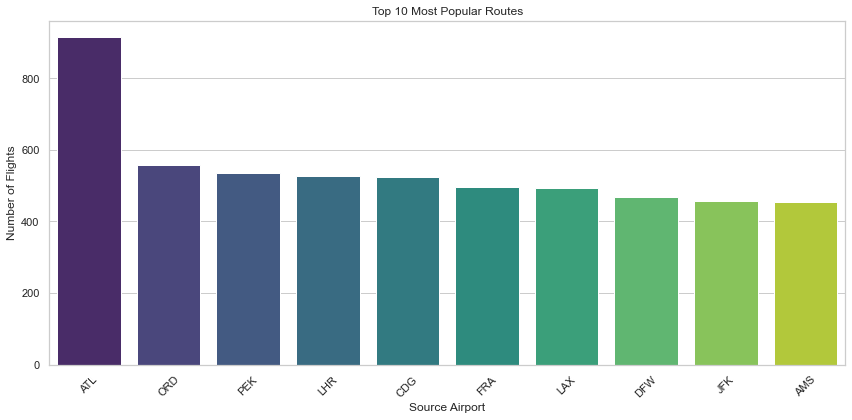

In [16]:


# Set up the plotting style
sns.set(style="whitegrid")

# Business Question: Route Analysis - Most Popular Routes
top_routes = data[' source airport'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_routes.index, y=top_routes.values, palette="viridis")
plt.title("Top 10 Most Popular Routes")
plt.xlabel("Source Airport")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


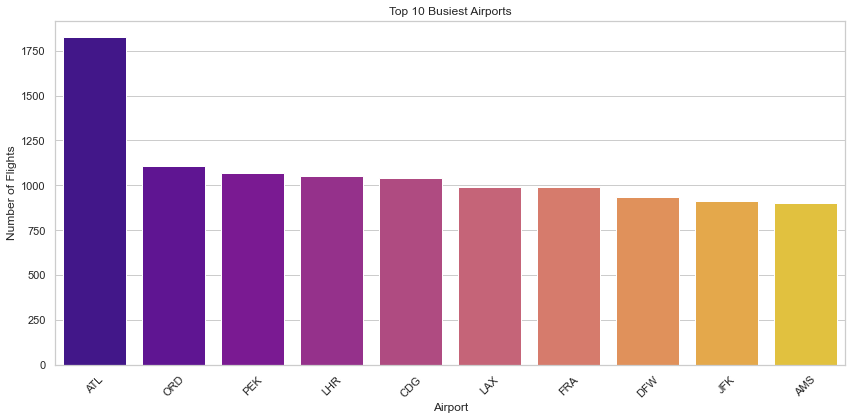

In [17]:
# Business Question: Airport Analysis - Busiest Airports
busiest_airports = data[' source airport'].append(data['destination airport']).value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=busiest_airports.index, y=busiest_airports.values, palette="plasma")
plt.title("Top 10 Busiest Airports")
plt.xlabel("Airport")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

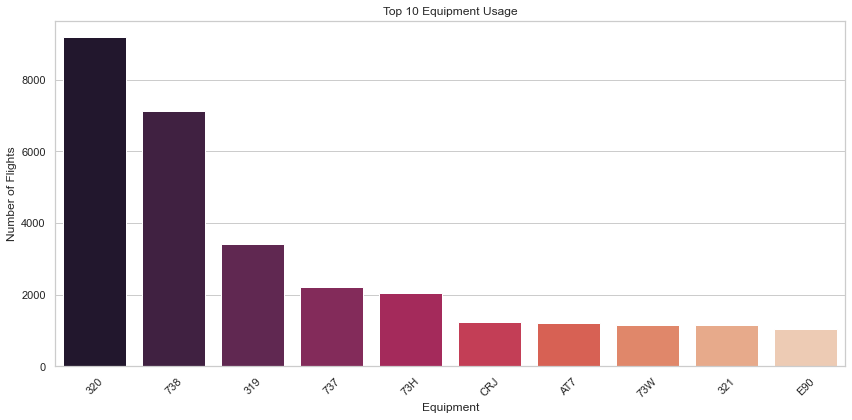

In [18]:
# Business Question: Equipment Analysis - Equipment Usage
equipment_usage = data[' equipment'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=equipment_usage.index, y=equipment_usage.values, palette="rocket")
plt.title("Top 10 Equipment Usage")
plt.xlabel("Equipment")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

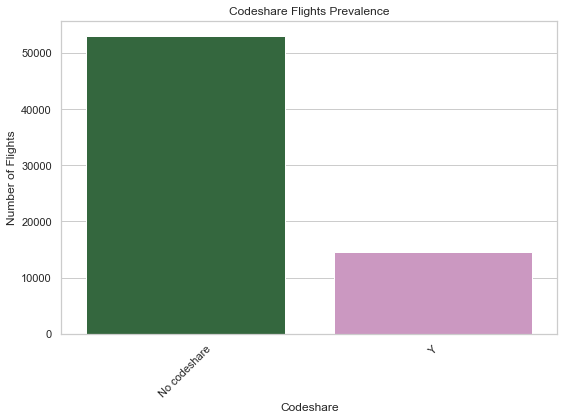

In [19]:
# Business Question: Codeshare Analysis - Prevalence of Codeshare Flights
codeshare_counts = data[' codeshare'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=codeshare_counts.index, y=codeshare_counts.values, palette="cubehelix")
plt.title("Codeshare Flights Prevalence")
plt.xlabel("Codeshare")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

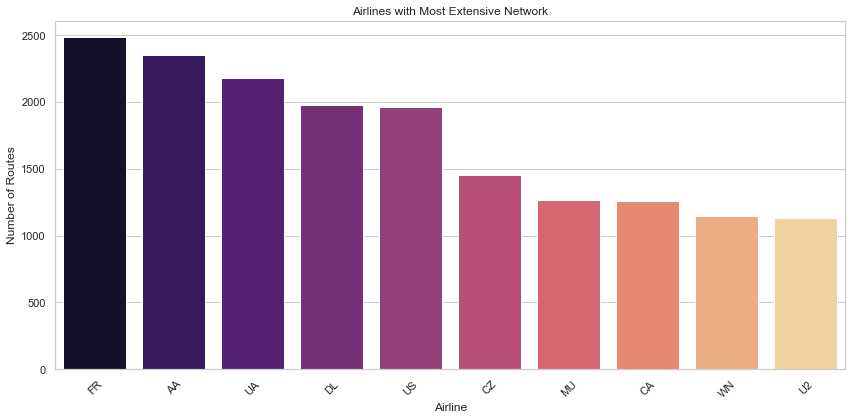

In [20]:
# Business Question: Airlines Analysis - Most Extensive Network
airlines_network = data['airline'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=airlines_network.index, y=airlines_network.values, palette="magma")
plt.title("Airlines with Most Extensive Network")
plt.xlabel("Airline")
plt.ylabel("Number of Routes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

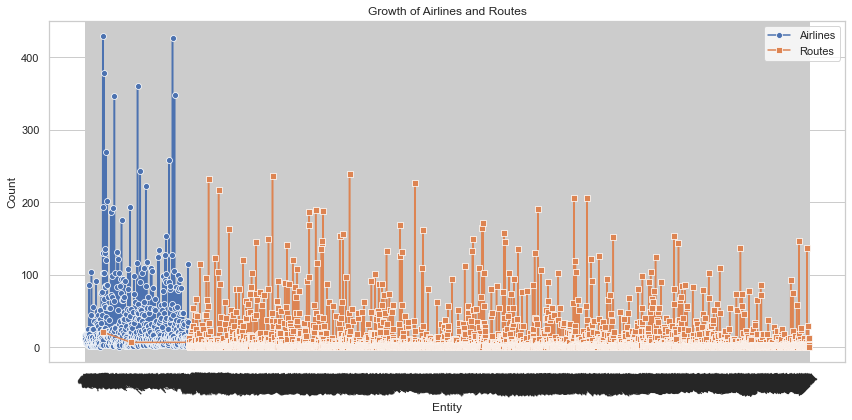

In [21]:
# Business Question: Network Growth Analysis - Airlines and Routes Over Time
airline_growth = data.groupby('airline')[' source airport'].nunique()
route_growth = data.groupby(' source airport')['destination airport'].nunique()

plt.figure(figsize=(12, 6))
sns.lineplot(x=airline_growth.index, y=airline_growth.values, marker='o', label='Airlines')
sns.lineplot(x=route_growth.index, y=route_growth.values, marker='s', label='Routes')
plt.title("Growth of Airlines and Routes")
plt.xlabel("Entity")
plt.ylabel("Count")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

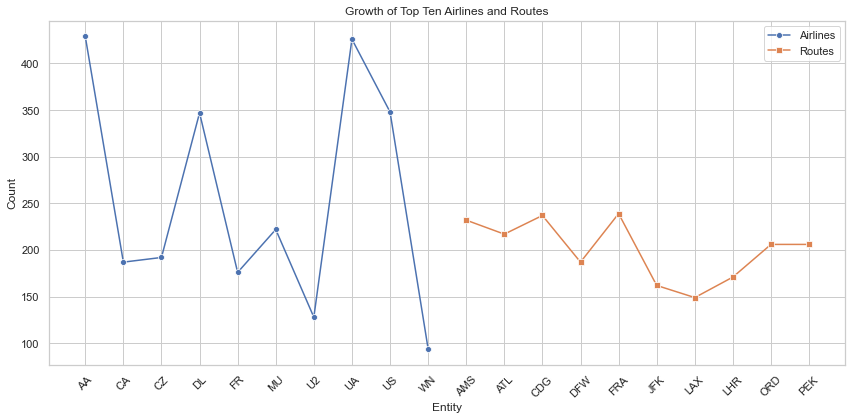

In [22]:
# Business Question: Network Growth Analysis - Top Ten Airlines and Routes Over Time
top_airlines = data['airline'].value_counts().nlargest(10).index
top_routes = data[' source airport'].value_counts().nlargest(10).index

airline_growth = data[data['airline'].isin(top_airlines)].groupby('airline')[' source airport'].nunique()
route_growth = data[data[' source airport'].isin(top_routes)].groupby(' source airport')['destination airport'].nunique()

plt.figure(figsize=(12, 6))
sns.lineplot(x=airline_growth.index, y=airline_growth.values, marker='o', label='Airlines')
sns.lineplot(x=route_growth.index, y=route_growth.values, marker='s', label='Routes')
plt.title("Growth of Top Ten Airlines and Routes")
plt.xlabel("Entity")
plt.ylabel("Count")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

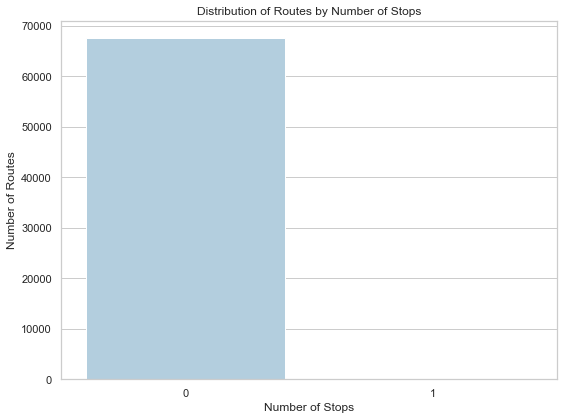

In [23]:
# Visualization: Distribution of Routes by Number of Stops
stops_counts = data[' stops'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=stops_counts.index, y=stops_counts.values, palette="Blues")
plt.title("Distribution of Routes by Number of Stops")
plt.xlabel("Number of Stops")
plt.ylabel("Number of Routes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
  







<AxesSubplot:>

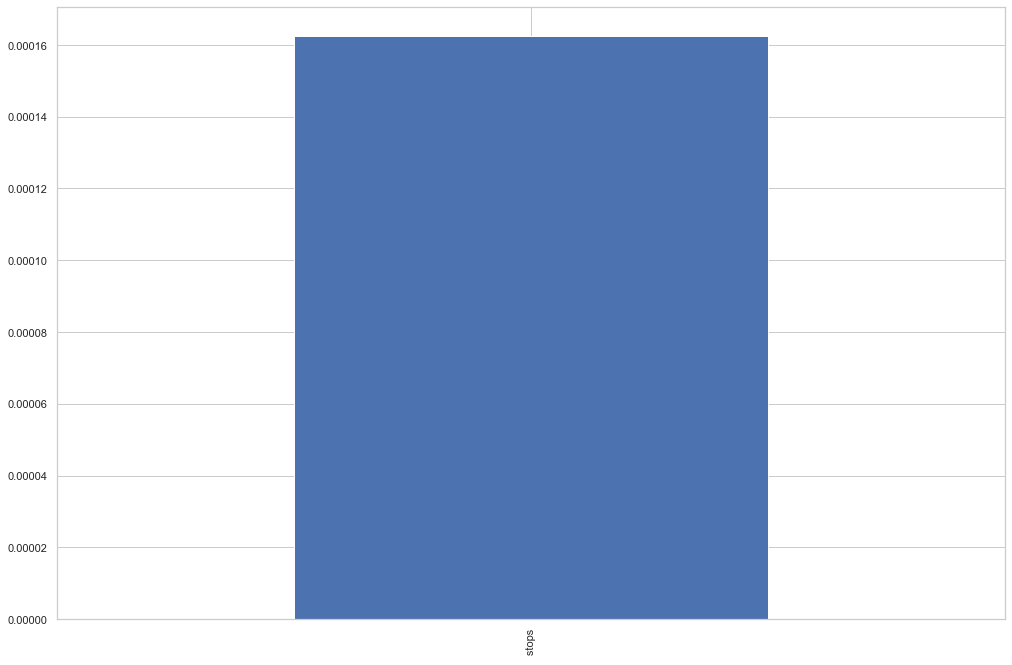

In [24]:
data.mean().plot(kind='bar')

# Correlation
Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It’s a common tool for describing simple relationships without making a statement about cause and effect. We can determine that there are two types of correlation :

#### Positive correlation :
In positive correlation , if one variable increases then the other variable increases and same if one variable decreases then the other variable decreases. The slope of the fitting line in such a case would be positive.
#### Negative correlation :
In negative correlation , the inverse relationship is there between the correlated variables , that is if one variable increases/decreases then the other variable decreases/increases.
Here we are using the heatmap function of the seaborn library to obtain the correlation between attributes of the dataset.

In [25]:
!pip install ppscore


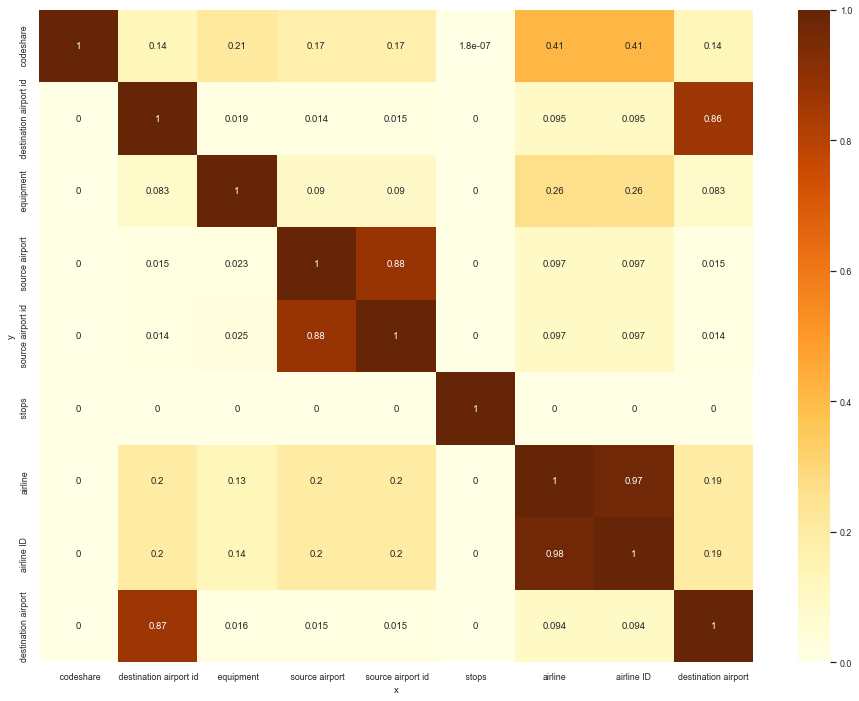

In [26]:
import ppscore as pps
import warnings
warnings.filterwarnings("ignore")


matrix_data = pps.matrix(data).pivot(columns='x', index='y',  values='ppscore')

sns.set(font_scale=0.8)
plt.figure(figsize=(16,12))
sns.heatmap(matrix_data, annot=True, cmap = sns.color_palette("YlOrBr", as_cmap=True))
plt.show()

## Inferences about the dataset

#### The most popular route is to and from ATL airport, with more than 800 flights followed by ORD, PEK, LHR all with more than 500 flights.
#### The busiest Airport is ATL with more than 1750 flights, followed by CRD, PEK,LHR and CDG, with slightly above 1000 flights.
#### The most used Aeroplane 320, with more than 9000 flights followed by 738 with about 7000 flights. we also have 319,737 and 73H slightly above or about 2000 flights.
#### Based on the codeshare in the flight industry, planes with no codeshare make more flights of above 5000 flights compared to planes with codespare marked by "Y" with flights above 1000 flights.
#### FR, AA, and UA are the Airlines with the most extensive networks with routes between 2000 and 2500 , they are followed by DL and US slightly below 2000 routes.
#### AA and UA are the most airlines with most growth in network extension overtime with about 450 routes, followed by DL and WN with about 350 network growth in routes.
#### AMS, CDG and FRA are the most flight routes with significance growth of about 240 routes to the airports followed by CRD and PEK with slightly above 2000 routes to these airpots


# Data Preprocessing
Pre-processing refers to the transformations applied to our data before feeding it to the algorithm. Data Preprocessing is a technique that is used to convert the raw data into a clean data set.

# Need of Data Preprocessing:-
For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner. Some specified Machine Learning model needs information in a specified format, for example, K-mean clustering does not support null values, therefore to execute k-mean clustering algorithm null values have to be managed from the original raw data set,  our dataset doesnot have any null value.
Data is limited so model will need to perform well with limited amount of data
Model will need to handle dummy variables well and not be dependent on ratio data
The ordinal variables may or may not be helful to the model
The data is pretty wide but not very deep, so reducing the factors may be necessary.

## MAKING NEW DATA

In [27]:
data_prep = data.copy()
ord_feature_list= ['airline', 'airline ID', ' source airport', ' source airport id',
       'destination airport', ' destination airport id', ' codeshare',
      ' stops', ' equipment']

In [28]:
#encoding
from sklearn.preprocessing import OrdinalEncoder
data_ord=data_prep[ord_feature_list]

enc = OrdinalEncoder()
enc.fit(data_ord)
data_ord_arr=enc.transform(data_ord)

data=pd.DataFrame(data_ord_arr, columns=ord_feature_list)
data

,airline,airline ID,source airport,source airport id,destination airport,destination airport id,codeshare,stops,equipment
0,0.0,380.0,49.0,1114.0,1556.0,1136.0,0.0,0.0,2917.0
1,0.0,380.0,151.0,1115.0,1556.0,1136.0,0.0,0.0,2917.0
2,0.0,380.0,151.0,1115.0,1900.0,1113.0,0.0,0.0,2917.0
3,0.0,380.0,471.0,1117.0,1556.0,1136.0,0.0,0.0,2917.0
4,0.0,380.0,471.0,1117.0,2153.0,1790.0,0.0,0.0,2917.0
...,...,...,...,...,...,...,...,...,...
67658,566.0,383.0,3130.0,2630.0,43.0,1335.0,0.0,0.0,3904.0
67659,567.0,161.0,698.0,1753.0,895.0,1072.0,0.0,0.0,1317.0
67660,567.0,161.0,889.0,1070.0,703.0,1754.0,0.0,0.0,1317.0
67661,567.0,161.0,889.0,1070.0,2141.0,1073.0,0.0,0.0,1317.0


# MODELING

# Clustering.

I'll use the elbow method to find the optimal number of clusters. This identifies the value of k (number of clusters) where the distortion (the within-cluster sum of squared errors or SSE) begins to increase the most rapidly.

In [29]:
from sklearn.cluster import KMeans
wcs=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++',max_iter = 250, n_init = 15, random_state=0)
    kmeans.fit(data)
    wcs.append(kmeans.inertia_)
    print(wcs)

[297423033315.1765]
[297423033315.1765, 226076825660.36176]
[297423033315.1765, 226076825660.36176, 197536317990.45328]
[297423033315.1765, 226076825660.36176, 197536317990.45328, 176059675592.32965]
[297423033315.1765, 226076825660.36176, 197536317990.45328, 176059675592.32965, 160246183318.5574]
[297423033315.1765, 226076825660.36176, 197536317990.45328, 176059675592.32965, 160246183318.5574, 148010055351.62573]
[297423033315.1765, 226076825660.36176, 197536317990.45328, 176059675592.32965, 160246183318.5574, 148010055351.62573, 139289686687.5826]
[297423033315.1765, 226076825660.36176, 197536317990.45328, 176059675592.32965, 160246183318.5574, 148010055351.62573, 139289686687.5826, 131689706175.87137]
[297423033315.1765, 226076825660.36176, 197536317990.45328, 176059675592.32965, 160246183318.5574, 148010055351.62573, 139289686687.5826, 131689706175.87137, 125214337461.326]


plotting the Result(line graph)

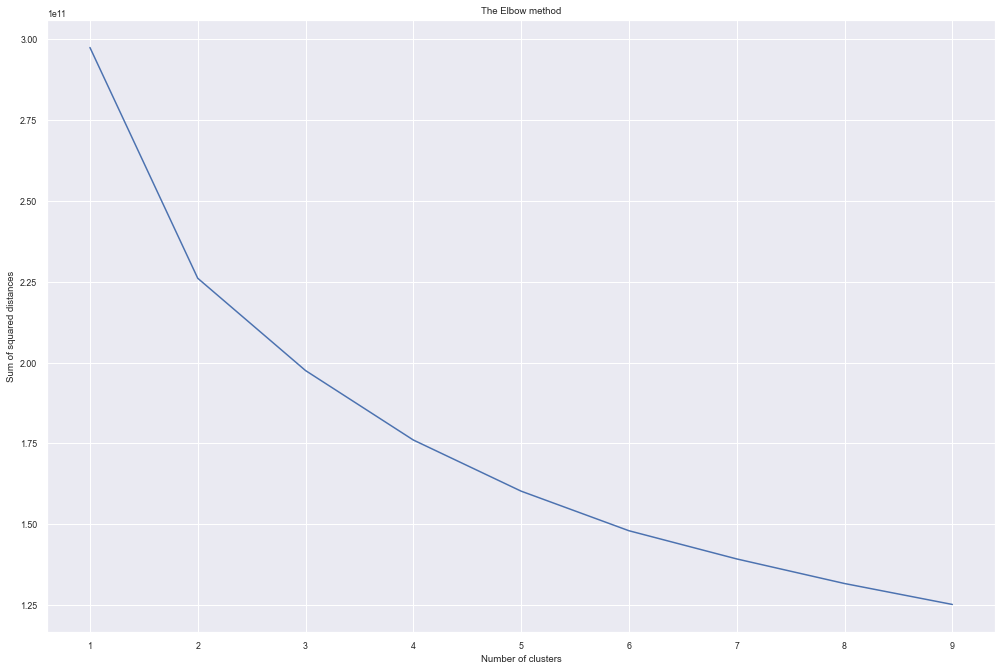

In [30]:
plt.plot(range(1,10), wcs)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()


It looks like the elbow is located at k=2... We can also use the silhouette score; this is a measure of how similar an objects is to its own cluster compared to other clusters. The score is higher when clusters are dense and well separated. A score of 1 is the highest and a score of -1 is the lowest. Scores around zero indicate overlapping clusters.

In [31]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


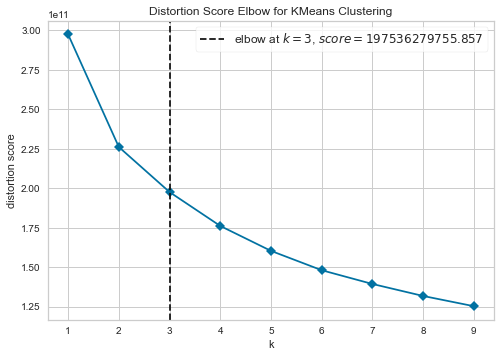

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings = False)
visualizer.fit(data)
visualizer.show()

In [33]:
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    print("For cluster: {}, the silhouette score is: {}".format(i,score))
    

For cluster: 2, the silhouette score is: 0.22657786251231024
For cluster: 3, the silhouette score is: 0.18583141457552538
For cluster: 4, the silhouette score is: 0.18138875224856124
For cluster: 5, the silhouette score is: 0.17804617992779156
For cluster: 6, the silhouette score is: 0.17855887593767805
For cluster: 7, the silhouette score is: 0.17157775948134513
For cluster: 8, the silhouette score is: 0.16947347903840276
For cluster: 9, the silhouette score is: 0.16834182597622896


k=2 gives the highest score, by a hair. In general these scores are not that high indicating that there will be a fair amount of overlap between clusters.

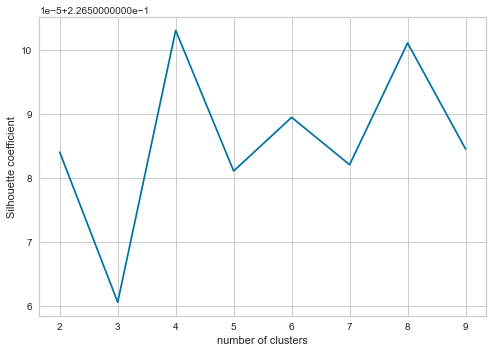

In [34]:
silhouette_coefficients = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=2, max_iter=100)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2,10), silhouette_coefficients)
plt.xticks(range(2,10))
plt.xlabel("number of clusters")
plt.ylabel("Silhouette coefficient")
plt.show()

# To visualize the data I will project the data to 2D

In [35]:
#pca = PCA()
#X = pca.fit_transform(data)

In [36]:
#kmeans = KMeans(n_clusters=4)
#label = kmeans.fit_predict(X)
#unique_labels = np.unique(label)

#for i in unique_labels:
   # plt.scatter(X[label==i,0], X[label==i,1], label=i, s=20)
    
#plt.legend()
#plt.title('routes group')
#plt.show()

In [37]:
# Importing Libraries for Modelling.

from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

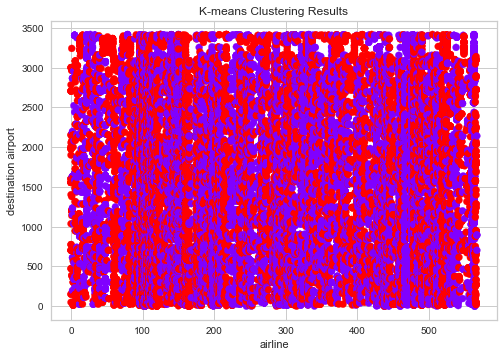

Mean Squared Error: 1352909.8147611138


In [40]:


# Perform K-means clustering
# Assuming you have selected k=3 from the elbow method
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(data)

# Visualize the clusters
plt.scatter(data['airline'], data['destination airport'], c=data['cluster'], cmap='rainbow')
plt.xlabel('airline')
plt.ylabel('destination airport')
plt.title('K-means Clustering Results')
plt.show()

# Now you can train the model and use it for predictions
# For this example, I'm assuming you have a target column called 'target_column'
# and you're splitting the data into features and target

features = data[['airline', 'destination airport']]
target = data[' equipment']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a model (you can replace this with the appropriate model for your problem)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model (you can use appropriate evaluation metrics based on your problem)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")
